### Packages

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters

### Functions

In [2]:
def compute_cost_with_both_regularization(A3, Y, parameters, lambd_ridge, lambd_lasso):
    """
    Implement the cost function with L1 and L2 regularization. 
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = compute_cost(A3, Y) # This gives you the cross-entropy part of the cost
    
    #(≈ 1 lines of code)
    # L2_regularization_cost = 
    # YOUR CODE STARTS HERE
    L2_regularization_cost = (np.sum(np.square(W1))+np.sum(np.square(W2))+np.sum(np.square(W3)))*(lambd_ridge/(2*m))
    L1_regularization_cost = (np.sum(np.absolute(W1))+np.sum(np.absolute(W2))+np.sum(np.absolute(W3)))*(lambd_lasso/(2*m))

    # YOUR CODE ENDS HERE
    
    cost = cross_entropy_cost + L2_regularization_cost + L1_regularization_cost
    
    return cost

In [3]:
def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    """
    Implements the forward propagation: LINEAR -> RELU + DROPOUT -> LINEAR -> RELU + DROPOUT -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (20, 2)
                    b1 -- bias vector of shape (20, 1)
                    W2 -- weight matrix of shape (3, 20)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    A3 -- last activation value, output of the forward propagation, of shape (1,1)
    cache -- tuple, information stored for computing the backward propagation
    """
    
    np.random.seed(1)
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    #(≈ 4 lines of code)         # Steps 1-4 below correspond to the Steps 1-4 described above. 
    # D1 =                                           # Step 1: initialize matrix D1 = np.random.rand(..., ...)
    # D1 =                                           # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
    # A1 =                                           # Step 3: shut down some neurons of A1
    # A1 =                                           # Step 4: scale the value of neurons that haven't been shut down
    # YOUR CODE STARTS HERE
    D1 = np.random.rand(A1.shape[0],A1.shape[1])
    D1 = (D1 < keep_prob).astype(int)
    A1 = A1 * D1
    A1 = A1/keep_prob
    
    # YOUR CODE ENDS HERE
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    #(≈ 4 lines of code)
    # D2 =                                           # Step 1: initialize matrix D2 = np.random.rand(..., ...)
    # D2 =                                           # Step 2: convert entries of D2 to 0 or 1 (using keep_prob as the threshold)
    # A2 =                                           # Step 3: shut down some neurons of A2
    # A2 =                                           # Step 4: scale the value of neurons that haven't been shut down
    # YOUR CODE STARTS HERE
    D2 = np.random.rand(A2.shape[0],A2.shape[1])
    D2 = (D2 < keep_prob).astype(int)
    A2 = A2 * D2
    A2 = A2/keep_prob    
    
    # YOUR CODE ENDS HERE
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

In [4]:
def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    """
    Implements the backward propagation of our baseline model to which we added dropout.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation_with_dropout()
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)
    #(≈ 2 lines of code)
    # dA2 =                # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    # dA2 =                # Step 2: Scale the value of neurons that haven't been shut down
    # YOUR CODE STARTS HERE
    dA2 = D2 * dA2
    dA2 = dA2 / keep_prob
    # YOUR CODE ENDS HERE
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    #(≈ 2 lines of code)
    # dA1 =                # Step 1: Apply mask D1 to shut down the same neurons as during the forward propagation
    # dA1 =                # Step 2: Scale the value of neurons that haven't been shut down
    # YOUR CODE STARTS HERE
    dA1 = D1 * dA1
    dA1 = dA1 /keep_prob
    
    # YOUR CODE ENDS HERE
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [5]:
def backward_propagation_with_both_regularization(X, Y, cache, lambd_ridge, lambd_lasso):
    """
    Implements the backward propagation of our baseline model to which we added an L2 and L1 regularization.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    #(≈ 1 lines of code)
    # dW3 = 1./m * np.dot(dZ3, A2.T) + None
    # YOUR CODE STARTS HERE
    dW3 = 1./m * np.dot(dZ3, A2.T) + lambd_ridge/m*W3 + lambd_lasso/(2*m)
    
    # YOUR CODE ENDS HERE
    db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    #(≈ 1 lines of code)
    # dW2 = 1./m * np.dot(dZ2, A1.T) + None
    # YOUR CODE STARTS HERE
    dW2 = 1./m * np.dot(dZ2, A1.T) + lambd_ridge/m*W2 + lambd_lasso/(2*m)
    
    # YOUR CODE ENDS HERE
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    #(≈ 1 lines of code)
    # dW1 = 1./m * np.dot(dZ1, X.T) + None
    # YOUR CODE STARTS HERE
    dW1 = 1./m * np.dot(dZ1, X.T) + lambd_ridge/m*W1 + lambd_lasso/(2*m)
    
    # YOUR CODE ENDS HERE
    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [6]:
def model(X, Y, learning_rate = 0.005, num_iterations = 20000, print_cost = True, lambd_ridge = 0, lambd_lasso = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd_lasso and lambd_ridge == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_both_regularization(a3, Y, parameters, lambd_ridge, lambd_lasso)
            
        # Backward propagation.
        assert ((lambd_ridge == 0 and lambd_lasso == 0) or keep_prob == 1)   # it is possible to use both L2 and L1 regularization and dropout, 
                                                                                # but this assignment will only explore one at a time
        if (lambd_ridge == 0 and lambd_lasso == 0) and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif (lambd_ridge != 0 or lambd_lasso != 0):
            grads = backward_propagation_with_both_regularization(X, Y, cache, lambd_ridge, lambd_lasso)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every num_iterations/4 
        if print_cost and i % (num_iterations/4) == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % (num_iterations/50) == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

## Use the a model and datasets (a complex classification problem that you can choose on your own) and test different regularization techniques:

Here we will be using the same dataset as the assignment 2 in which the problem is to classify a set of images as cats or not. 
Although it is not a requirement from this assignment, we will first try to solve this problem without regularization whatsoever.

To follow the same idea from the assignment 2, for the training of the model we will be using the given dataset by the teacher as a file named train_catvnoncat.h5. While the first 100 images from the sets of cats and dogs labeled as "train" retrieved from https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification?select=train will be used for our testing. And the next 100 images from those that same sets will be used for our tuning set. We will first process them to reduce their pixel resolution to the same as the ones we used in the training (64 pixels x 64 pixels) and then represent them as arrays.

### 0.  Preprocess datasets

In [7]:
# Some useful functions and packages for processing and loading the datasets:
import h5py
import scipy
from PIL import Image
from scipy import ndimage

def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

def preprocess_dataset(dataset):
    dataset_flatten = dataset.reshape(dataset.shape[0],-1).T
    return dataset_flatten/255 

train_set_x = preprocess_dataset(train_set_x_orig) 
test_set_x = preprocess_dataset(test_set_x_orig)

## Extract our own images from cats and dogs
import os

def process_images(directory, target_size=(64, 64), image_range=range(0,100)):
    image_list = []

    filenames = sorted(os.listdir(directory))[min(image_range):max(image_range)+1]
    
    for filename in filenames:
        if filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            
            img = Image.open(file_path)
            img_resized = img.resize(target_size)
            img_array = np.array(img_resized)
            
            image_list.append(img_array)
    
    return np.array(image_list)

test_cat_images = process_images("datasets/train/cats")
test_dog_images = process_images("datasets/train/dogs")
tuning_cat_images = process_images("datasets/train/cats",image_range=(101,200))
tuning_dog_images = process_images("datasets/train/dogs",image_range=(101,200))

def join_cats_and_dogs(cat_images,dog_images):
    cat_set_X = preprocess_dataset(cat_images)
    dog_set_X = preprocess_dataset(dog_images)
    m_cat_set = cat_set_X.shape[1]
    cat_set_Y = np.ones((1, m_cat_set))
    m_dog_set = dog_set_X.shape[1]
    dog_set_Y = np.zeros((1, m_dog_set))

    set_X = np.concatenate((cat_set_X, dog_set_X), axis=1)
    set_Y = np.concatenate((cat_set_Y, dog_set_Y), axis=1)

    np.random.seed(1)
    shuffle_indices = np.random.permutation(set_X.shape[1])
    final_set_X = set_X[:, shuffle_indices]
    final_set_Y = set_Y[:, shuffle_indices]

    return final_set_X,final_set_Y

final_test_X, final_test_Y = join_cats_and_dogs(test_cat_images,test_dog_images)
final_tuning_X, final_tuning_Y = join_cats_and_dogs(tuning_cat_images,tuning_dog_images)

### 0.1 Not regularized DNN

Cost after iteration 0: 0.7502622316877251
Cost after iteration 5000: 0.01150672906595766
Cost after iteration 10000: 0.008207914489790033
Cost after iteration 15000: 0.007101274413399227


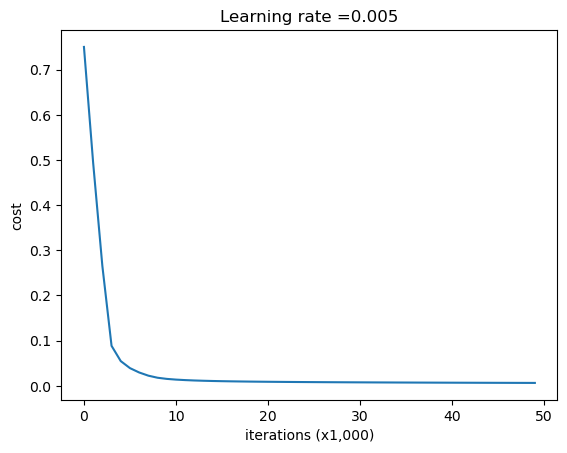

On the train set:
Accuracy: 1.0
On the test set:
Accuracy: 0.605


In [8]:
parameters = model(train_set_x, train_set_y)

print ("On the train set:")
predictions_train = predict(train_set_x, train_set_y, parameters)
print ("On the test set:")
predictions_test = predict(final_test_X, final_test_Y, parameters)

### 1. L2 (Ridge) regularization, as given in the notebook, Test different values of lambda and report your results on training and validation accuracy.

Cost after iteration 0: 0.7743043795029056
Cost after iteration 5000: 0.04275588867991342
Cost after iteration 10000: 0.038782865294944124
Cost after iteration 15000: 0.03646643811066949


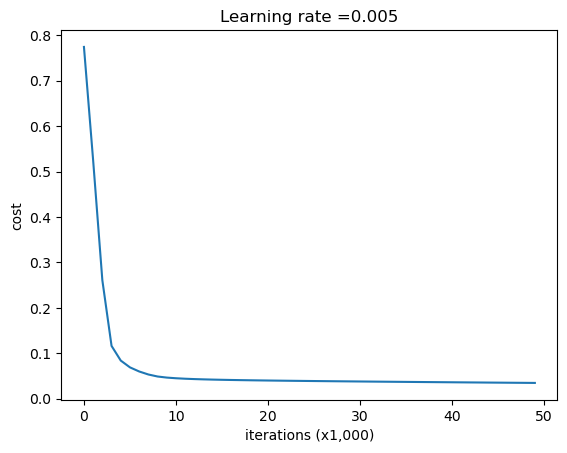

Lambda ridge: 0.4
On the train set:
Accuracy: 1.0
On the tuning set:
Accuracy: 0.605


In [9]:
parameters = model(train_set_x, train_set_y, lambd_ridge=0.4)
print("Lambda ridge: 0.4" )
print ("On the train set:")
predict(train_set_x, train_set_y, parameters)
print ("On the tuning set:")
predict(final_tuning_X, final_tuning_Y, parameters)

parameters_ridge_04 = parameters

Cost after iteration 0: 0.7983465273180862
Cost after iteration 5000: 0.0699431628484971
Cost after iteration 10000: 0.062074229519008234
Cost after iteration 15000: 0.056374285875384934


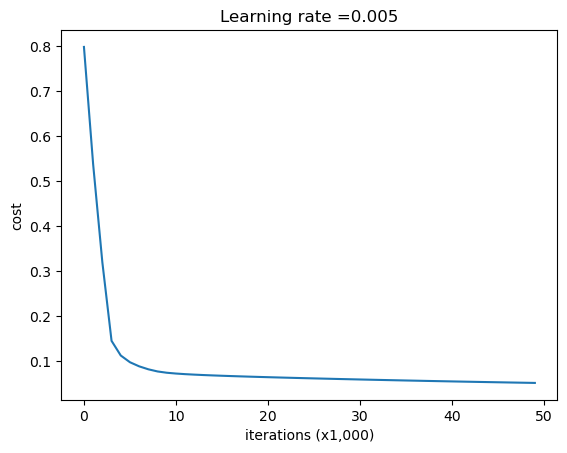

Lambda ridge: 0.8
On the train set:
Accuracy: 1.0
On the tuning set:
Accuracy: 0.615


In [10]:
parameters = model(train_set_x, train_set_y, lambd_ridge=0.8)
print("Lambda ridge: 0.8" )
print ("On the train set:")
predict(train_set_x, train_set_y, parameters)
print ("On the tuning set:")
predict(final_tuning_X, final_tuning_Y, parameters)

parameters_ridge_08 = parameters

Cost after iteration 0: 0.8223886751332667


Cost after iteration 5000: 0.09353992287754989
Cost after iteration 10000: 0.08008985997407801
Cost after iteration 15000: 0.07045392456869382


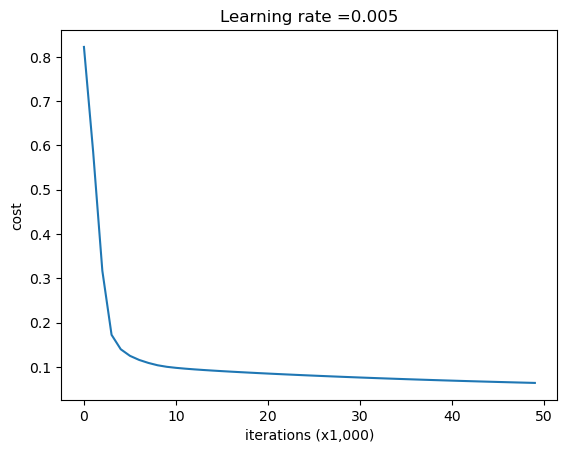

Lambda ridge: 1.2
On the train set:
Accuracy: 1.0
On the tuning set:
Accuracy: 0.6


In [11]:
parameters = model(train_set_x, train_set_y, lambd_ridge=1.2)
print("Lambda ridge: 1.2" )
print ("On the train set:")
predict(train_set_x, train_set_y, parameters)
print ("On the tuning set:")
predict(final_tuning_X, final_tuning_Y, parameters)

parameters_ridge_12 = parameters

Cost after iteration 0: 0.8464308229484474
Cost after iteration 5000: 0.11408671971724538
Cost after iteration 10000: 0.09418118847948329
Cost after iteration 15000: 0.08087965720685916


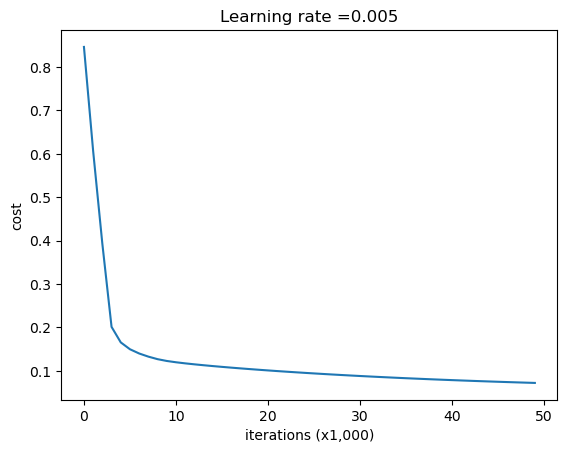

Lambda ridge: 1.6
On the train set:
Accuracy: 1.0
On the tuning set:
Accuracy: 0.615


In [13]:
parameters = model(train_set_x, train_set_y, lambd_ridge=1.6)
print("Lambda ridge: 1.6" )
print ("On the train set:")
predict(train_set_x, train_set_y, parameters)
print ("On the tuning set:")
predict(final_tuning_X, final_tuning_Y, parameters)

parameters_ridge_16 = parameters

Cost after iteration 0: 0.8945151185788085
Cost after iteration 5000: 0.1476671608631296
Cost after iteration 10000: 0.11479986911910173
Cost after iteration 15000: 0.09626751271643127


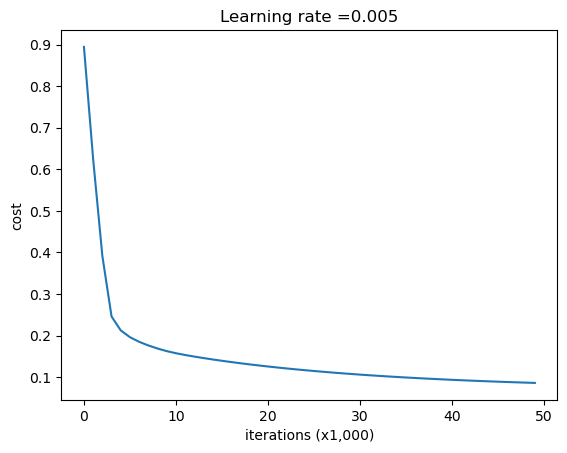

Lambda ridge: 2.4
On the train set:
Accuracy: 1.0
On the tuning set:
Accuracy: 0.615


In [14]:
parameters = model(train_set_x, train_set_y, lambd_ridge=2.4)
print("Lambda ridge: 2.4" )
print ("On the train set:")
predict(train_set_x, train_set_y, parameters)
print ("On the tuning set:")
predict(final_tuning_X, final_tuning_Y, parameters)

parameters_ridge_24 = parameters

In [19]:
print ("On the test set:")
predict(final_test_X, final_test_Y, parameters_ridge_16)

On the test set:
Accuracy: 0.605


array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 0]])

### 2. L1 (Lasso) regularization, you have to modify the code. Test different values of lambda and report your results on training and validation accuracy.

Cost after iteration 0: 0.7502622316877251


Cost after iteration 5000: 0.643973968654539
Cost after iteration 10000: 0.643973750295408
Cost after iteration 15000: 0.6439737503118229


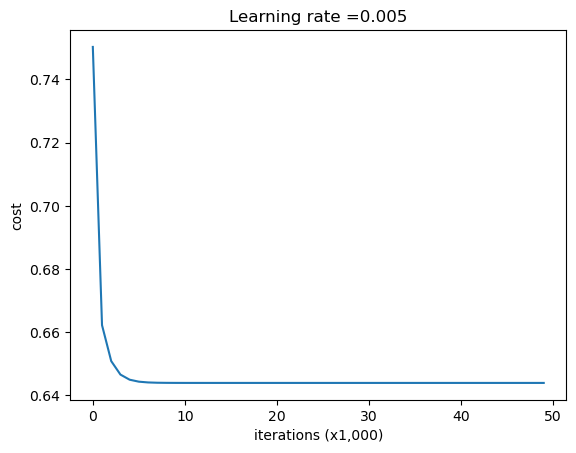

Lambda lasso: 0.4
On the train set:
Accuracy: 0.6555023923444976
On the tuning set:
Accuracy: 0.5


In [20]:
parameters = model(train_set_x, train_set_y, lambd_lasso=0.4)
print("Lambda lasso: 0.4" )
print ("On the train set:")
predict(train_set_x, train_set_y, parameters)
print ("On the tuning set:")
predict(final_tuning_X, final_tuning_Y, parameters)

parameters_lasso_04 = parameters

Cost after iteration 0: 0.7502622316877251


Cost after iteration 5000: 0.6439738527551946
Cost after iteration 10000: 0.643973791791339
Cost after iteration 15000: 0.6439737887748388


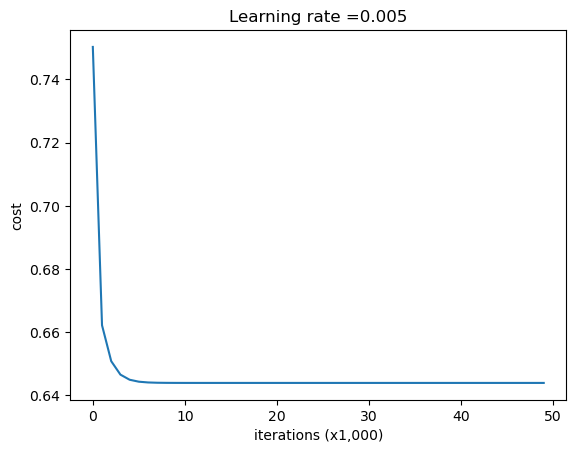

Lambda lasso: 0.8
On the train set:
Accuracy: 0.6555023923444976
On the tuning set:
Accuracy: 0.5


In [21]:
parameters = model(train_set_x, train_set_y, lambd_lasso=0.8)
print("Lambda lasso: 0.8" )
print ("On the train set:")
predict(train_set_x, train_set_y, parameters)
print ("On the tuning set:")
predict(final_tuning_X, final_tuning_Y, parameters)

parameters_lasso_08 = parameters

Cost after iteration 0: 0.7502622316877251
Cost after iteration 5000: 0.6439737761596854
Cost after iteration 10000: 0.6439738611367636
Cost after iteration 15000: 0.6439738475154277


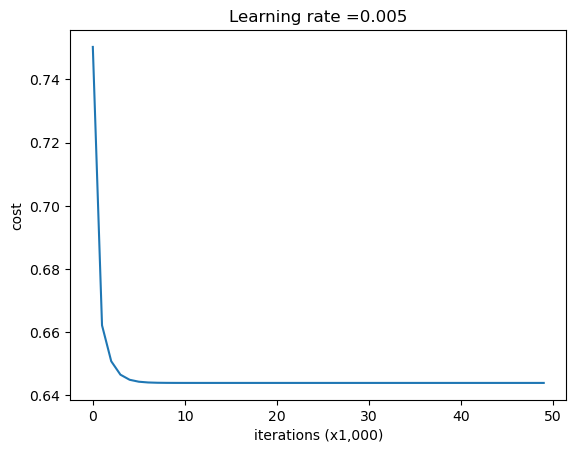

Lambda lasso: 1.2
On the train set:
Accuracy: 0.6555023923444976
On the tuning set:
Accuracy: 0.5


In [22]:
parameters = model(train_set_x, train_set_y, lambd_lasso=1.2)
print("Lambda lasso: 1.2" )
print ("On the train set:")
predict(train_set_x, train_set_y, parameters)
print ("On the tuning set:")
predict(final_tuning_X, final_tuning_Y, parameters)

parameters_lasso_12 = parameters

Cost after iteration 0: 0.7502622316877251
Cost after iteration 5000: 0.033139491671659374
Cost after iteration 10000: 0.014808547098081545
Cost after iteration 15000: 0.011741867086968732


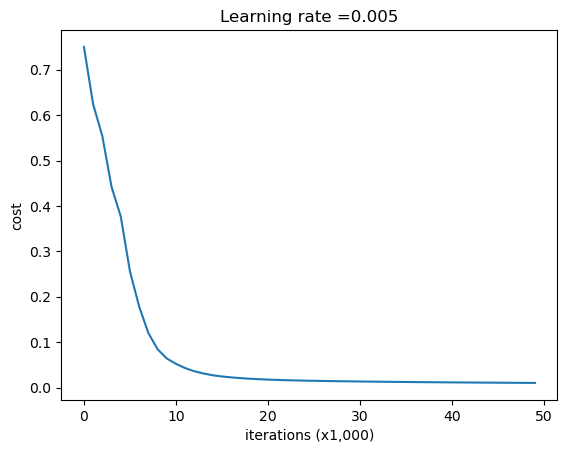

Lambda lasso: 0.2
On the train set:
Accuracy: 1.0
On the tuning set:
Accuracy: 0.56


In [24]:
parameters = model(train_set_x, train_set_y, lambd_lasso=0.2)
print("Lambda lasso: 0.2" )
print ("On the train set:")
predict(train_set_x, train_set_y, parameters)
print ("On the tuning set:")
predict(final_tuning_X, final_tuning_Y, parameters)

parameters_lasso_02 = parameters

Cost after iteration 0: 0.7502622316877251
Cost after iteration 5000: 0.030307792657064937
Cost after iteration 10000: 0.01636898761876366
Cost after iteration 15000: 0.013147798203169142


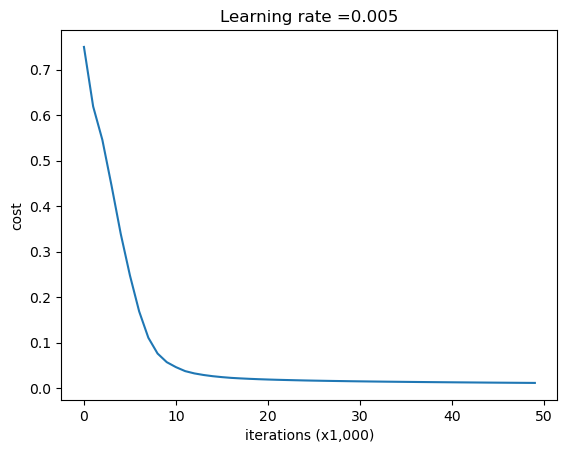

Lambda lasso: 0.3
On the train set:
Accuracy: 1.0
On the tuning set:
Accuracy: 0.525


In [26]:
parameters = model(train_set_x, train_set_y, lambd_lasso=0.3)
print("Lambda lasso: 0.3" )
print ("On the train set:")
predict(train_set_x, train_set_y, parameters)
print ("On the tuning set:")
predict(final_tuning_X, final_tuning_Y, parameters)

parameters_lasso_03 = parameters

In [28]:
print ("On the test set:")
predict(final_test_X, final_test_Y, parameters_lasso_03)

On the test set:
Accuracy: 0.635


array([[1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 0]])

#### 2.5 Best Lasso + Best Ridge

Cost after iteration 0: 2.1219244140231805
Cost after iteration 5000: 3.2066184161268017
Cost after iteration 10000: 5.83254544186545
Cost after iteration 15000: 8.244861750075431


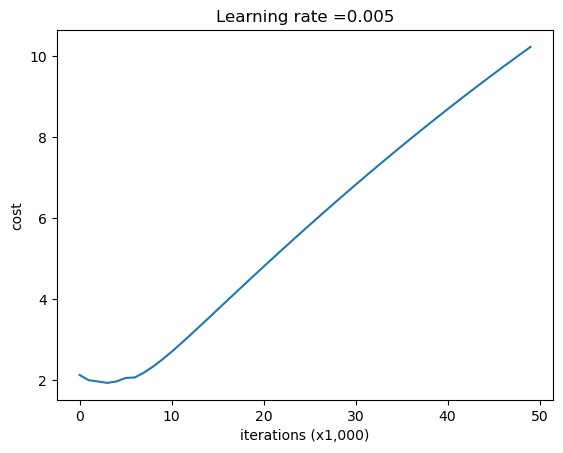

Lambda lasso: 0.4 Lambda ridge: 1.6
On the train set:
Accuracy: 1.0
On the tuning set:
Accuracy: 0.555


In [29]:
parameters = model(train_set_x, train_set_y, lambd_lasso=0.3, lambd_ridge=1.6)
print("Lambda lasso: 0.3 Lambda ridge: 1.6" )
print ("On the train set:")
predict(train_set_x, train_set_y, parameters)
print ("On the tuning set:")
predict(final_tuning_X, final_tuning_Y, parameters)

parameters_lasso_ridge = parameters

In [30]:
print ("On the test set:")
predict(final_test_X, final_test_Y, parameters_lasso_ridge)

On the test set:
Accuracy: 0.55


array([[1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        1, 0]])

### 3. Dropout, as given in the notebook, Test different values of dropout and report your results on training and validation accuracy.

Cost after iteration 0: 0.7555635240314136


Cost after iteration 5000: 0.07177979405821541
Cost after iteration 10000: 0.06886983329444936
Cost after iteration 15000: 0.0682580444470409


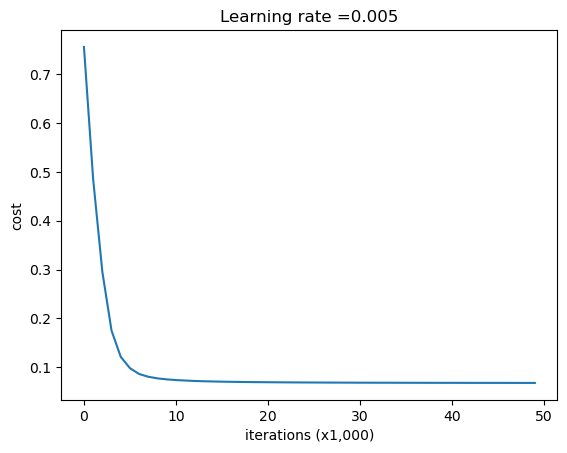

Keep Prob: 0.9
On the train set:
Accuracy: 0.9282296650717703
On the tuning set:
Accuracy: 0.57


In [31]:
parameters = model(train_set_x, train_set_y, keep_prob = 0.9)
print("Keep Prob: 0.9" )
print ("On the train set:")
predict(train_set_x, train_set_y, parameters)
print ("On the tuning set:")
predict(final_tuning_X, final_tuning_Y, parameters)

parameters_keep_90 = parameters

Cost after iteration 0: 0.7626107631983896
Cost after iteration 5000: 0.15978210516900204
Cost after iteration 10000: 0.1471757729231445
Cost after iteration 15000: 0.1361759645307361


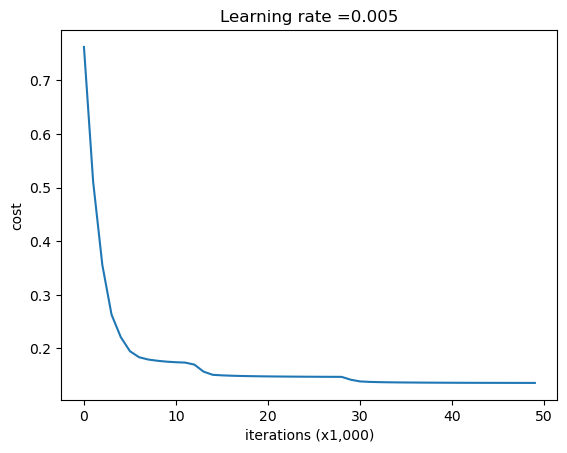

Keep Prob: 0.8
On the train set:
Accuracy: 0.84688995215311
On the tuning set:
Accuracy: 0.555


In [32]:
parameters = model(train_set_x, train_set_y, keep_prob = 0.8)
print("Keep Prob: 0.8" )
print ("On the train set:")
predict(train_set_x, train_set_y, parameters)
print ("On the tuning set:")
predict(final_tuning_X, final_tuning_Y, parameters)

parameters_keep_80 = parameters

Cost after iteration 0: 0.7745944180899716
Cost after iteration 5000: 0.1532471441263492
Cost after iteration 10000: 0.11736468282188488
Cost after iteration 15000: 0.10547672165407229


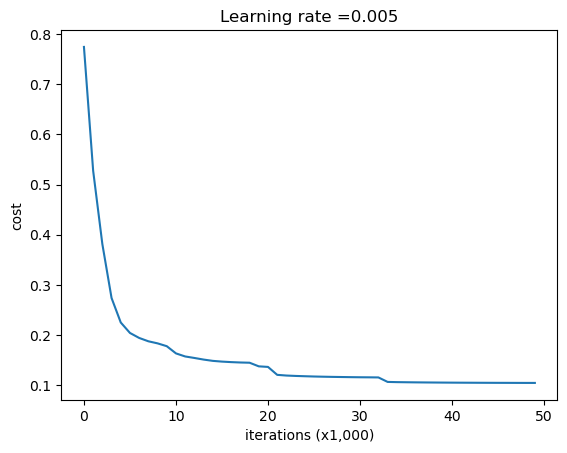

Keep Prob: 0.7
On the train set:
Accuracy: 0.8421052631578947
On the tuning set:
Accuracy: 0.525


In [33]:
parameters = model(train_set_x, train_set_y, keep_prob = 0.7)
print("Keep Prob: 0.7" )
print ("On the train set:")
predict(train_set_x, train_set_y, parameters)
print ("On the tuning set:")
predict(final_tuning_X, final_tuning_Y, parameters)

parameters_keep_70 = parameters

Cost after iteration 0: 0.754253102501721
Cost after iteration 5000: 0.023660476105161168
Cost after iteration 10000: 0.019286924492711025
Cost after iteration 15000: 0.017654036943498996


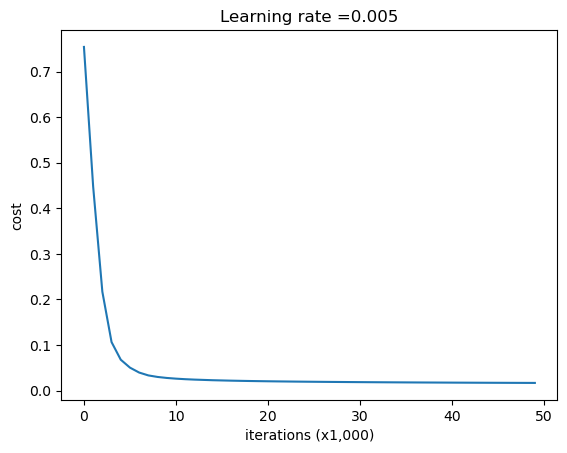

Keep Prob: 0.95
On the train set:
Accuracy: 0.9712918660287081
On the tuning set:
Accuracy: 0.585


In [34]:
parameters = model(train_set_x, train_set_y, keep_prob = 0.95)
print("Keep Prob: 0.95" )
print ("On the train set:")
predict(train_set_x, train_set_y, parameters)
print ("On the tuning set:")
predict(final_tuning_X, final_tuning_Y, parameters)

parameters_keep_95 = parameters

In [35]:
print ("On the test set:")
predict(final_test_X, final_test_Y, parameters_keep_95)

On the test set:
Accuracy: 0.585


array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 0]])

### 4. Data aumentation. If you are doing image classification your can create new images by using tools liek Bultaugmentations. If you are using other dataset you can create new data points randomly.

In [ ]:
# pip install imgaug

In [36]:
import imgaug.augmenters as iaa

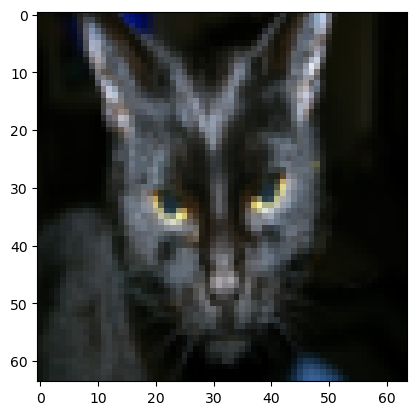

In [37]:
def augment_image(image):
    seq = iaa.Sequential([
        iaa.Fliplr(0.5),  # horizontal flips
        iaa.Crop(percent=(0, 0.1)),  # random crops
        # Gaussian blur
        iaa.GaussianBlur(sigma=(0, 1.5)),
        # Strengthen or weaken the contrast in each image
        iaa.contrast.LinearContrast((0.75, 1.5)),
        # Add gaussian noise
        iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05 * 255), per_channel=0.5),
        # Make some images brighter and some darker
        iaa.Multiply((0.8, 1.2), per_channel=0.2),
        # Apply affine transformations
        iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
            rotate=(-45, 45),
            shear=(-16, 16)
        )
    ], random_order=True)

    # Augment images
    augmented_images = [seq(image=image) for _ in range(10)]

    return augmented_images

augmented_images = augment_image(image = train_set_x_orig[25])
plt.imshow(train_set_x_orig[25])


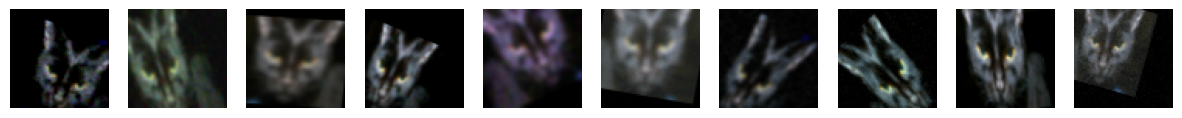

In [38]:
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    axes[i].imshow(augmented_images[i])
    axes[i].axis('off')

plt.show()

In [39]:
augmented_images_set_orig = []

for i in range(len(train_set_x_orig)):
    augmented_images = augment_image(image = train_set_x_orig[i])
    augmented_images_set_orig.append(augmented_images)

augmented_images_set_orig = np.array(augmented_images_set_orig)
augmented_images_set_orig = np.reshape(augmented_images_set_orig, (-1, 64, 64, 3))

In [40]:
augmented_images_set = preprocess_dataset(augmented_images_set_orig)
augmented_images_labels = np.repeat(train_set_y, 10)
augmented_images_labels = augmented_images_labels.reshape((1,2090))

In [41]:
temp_train_set_augmented_x = np.concatenate((train_set_x, augmented_images_set), axis=1)
temp_train_set_augmented_y = np.concatenate((train_set_y, augmented_images_labels), axis=1)

np.random.seed(1)
shuffle_indices = np.random.permutation(temp_train_set_augmented_x.shape[1])
train_set_augmented_x = temp_train_set_augmented_x[:, shuffle_indices]
train_set_augmented_y = temp_train_set_augmented_y[:, shuffle_indices]

Cost after iteration 0: 0.7396962829537499
Cost after iteration 5000: 0.1877759359064319
Cost after iteration 10000: 0.023758339057997093
Cost after iteration 15000: 0.009239215419057223


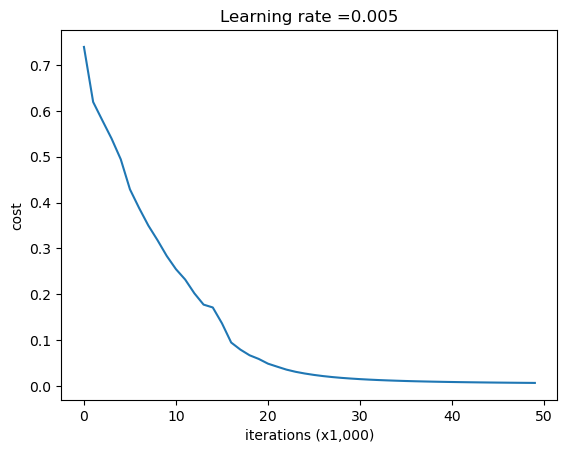

Augmented dataset + best model (lasso)
On the train set:
Accuracy: 0.9986950848194868
On the test set:
Accuracy: 0.6


In [42]:
parameters = model(train_set_augmented_x, train_set_augmented_y, lambd_lasso=0.3)

print("Augmented dataset + best model (lasso)")
print ("On the train set:")
predictions_train = predict(train_set_augmented_x, train_set_augmented_y, parameters)
print ("On the test set:")
predictions_test = predict(final_test_X, final_test_Y, parameters)

Cost after iteration 0: 0.7484388821592701
Cost after iteration 5000: 0.1955068433777713
Cost after iteration 10000: 0.038899225191272355
Cost after iteration 15000: 0.026414589794795766


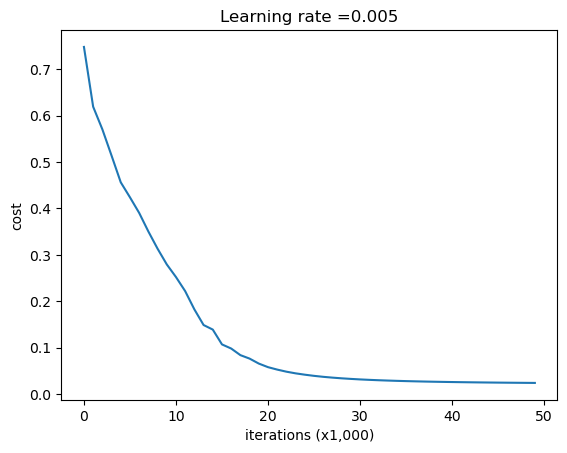

Augmented dataset + second best model (ridge)
On the train set:
Accuracy: 1.0
On the test set:
Accuracy: 0.605


In [43]:
parameters = model(train_set_augmented_x, train_set_augmented_y, lambd_ridge=1.6)

print("Augmented dataset + second best model (ridge)")
print ("On the train set:")
predictions_train = predict(train_set_augmented_x, train_set_augmented_y, parameters)
print ("On the test set:")
predictions_test = predict(final_test_X, final_test_Y, parameters)

### 5. Conclusions
   

| Model | Training Accuracy | Testing Accuracy |
|-----------|-----------|-----------|
| Logistic   | 99.0 %   | 60.0 %   |
| DNN      | 100 %   | 60.5 %   |
| DNN + Ridge   | 100 %   | 60.5 %   |
| DNN + Lasso  | 100 %  | 63.5 %  |
| DNN + Best Ridge + Best Lasso  | 100%  | 55.5%  |
| DNN + Dropout  | 97.1%  | 58.5%  |
| DNN + Aug + Lasso  | 99.9%  | 60%  |
| DNN + Aug + Ridge  | 100%  | 60.5%  |

It is evident that while the models exhibit overfitting with high training accuracy and lower testing accuracy, there remain unexplored strategies to enhance performance. For instance, increasing the number of iterations and adjusting learning rates showed promising results when exploring this parameters (we increased +5% accuracy by increasing the number of iterations from 10k to 20k and decreasing the learning rate from 0.01 to 0.005, however we do not show this in this notebook). 
Regularization techniques, particularly with Ridge and Lasso, have demonstrated limited impact individually, but there's potential in further exploration, such as increasing lambda values for Ridge. By the other hand, Lasso regularization didn't address overfitting, but increasing the values for lambda showed a decrease in both the training and tuning accuracy, maybe exploring even higher values for lambda would help.
Combining these regularization (lasso and ridge) techniques did not yield significant improvements, suggesting the need for joint parameter tuning.  Data augmentation, while expected to enhance accuracy by diversifying the training data, has shown only modest impact, possibly requiring parameter tuning on augmented datasets. Despite these challenges, there's potential for improvement, possibly through obtaining a larger dataset, as accuracy variations across techniques remain relatively stable.